<a href="https://colab.research.google.com/github/kimberlyhau/StockMarketPredictor/blob/main/Copy_of_LSTMModel_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [3]:
import re

In [4]:
import os
os.chdir("drive/My Drive")

In [5]:
sentiment_file = os.path.join('/content/drive/My Drive/sentiments.txt')
stock_prices_folder = os.path.join('/content/drive/My Drive/stock_market_data')

In [6]:
with open(sentiment_file, 'r') as file_obj:
    text = file_obj.read()
    txt_list = text.split('[')

In [7]:
stock_data_lst = []
for filename in os.listdir(stock_prices_folder):
    if ".txt" in filename:
      #file_object = open(folder + "/" + filename, "r")
      with open(stock_prices_folder + "/" + filename, 'r') as file_obj:
        text = file_obj.read()
        stock_data_lst.append([filename.replace('.txt', ''), re.split(',|\n', text)])

In [8]:
stock_data_lst[0][1]

['Date',
 'Close Prices Real Estate',
 '2019-01-02',
 '377.6545187902822',
 '2019-01-03',
 '378.6804341088255',
 '2019-01-04',
 '382.3176520847931',
 '2019-01-07',
 '384.2787421698025',
 '2019-01-08',
 '390.98490886682697',
 '2019-01-09',
 '388.23277794595646',
 '2019-01-10',
 '395.632918319235',
 '2019-01-11',
 '396.4174421271933',
 '2019-01-14',
 '396.64635468752914',
 '2019-01-15',
 '401.5061864569485',
 '2019-01-16',
 '403.0354925700603',
 '2019-01-17',
 '404.59816922603846',
 '2019-01-18',
 '403.88945732691394',
 '2019-01-22',
 '402.93075964524706',
 '2019-01-23',
 '402.7758401816464',
 '2019-01-24',
 '404.86439106138783',
 '2019-01-25',
 '408.30952186086',
 '2019-01-28',
 '412.83843728151646',
 '2019-01-29',
 '416.23512950995877',
 '2019-01-30',
 '419.2616172932804',
 '2019-01-31',
 '424.99982535258425',
 '2019-02-01',
 '422.60186537142715',
 '2019-02-04',
 '424.6248421569101',
 '2019-02-05',
 '426.8768748841932',
 '2019-02-06',
 '422.9731826697953',
 '2019-02-07',
 '426.34018486

In [9]:
stock_data_lst

[['Real EstateSP500Data',
  ['Date',
   'Close Prices Real Estate',
   '2019-01-02',
   '377.6545187902822',
   '2019-01-03',
   '378.6804341088255',
   '2019-01-04',
   '382.3176520847931',
   '2019-01-07',
   '384.2787421698025',
   '2019-01-08',
   '390.98490886682697',
   '2019-01-09',
   '388.23277794595646',
   '2019-01-10',
   '395.632918319235',
   '2019-01-11',
   '396.4174421271933',
   '2019-01-14',
   '396.64635468752914',
   '2019-01-15',
   '401.5061864569485',
   '2019-01-16',
   '403.0354925700603',
   '2019-01-17',
   '404.59816922603846',
   '2019-01-18',
   '403.88945732691394',
   '2019-01-22',
   '402.93075964524706',
   '2019-01-23',
   '402.7758401816464',
   '2019-01-24',
   '404.86439106138783',
   '2019-01-25',
   '408.30952186086',
   '2019-01-28',
   '412.83843728151646',
   '2019-01-29',
   '416.23512950995877',
   '2019-01-30',
   '419.2616172932804',
   '2019-01-31',
   '424.99982535258425',
   '2019-02-01',
   '422.60186537142715',
   '2019-02-04',
   '4

In [10]:
#stock_data_lst[-2]

In [11]:
#stocks_df = pd.DataFrame(columns = ['Stock Name', 'Stock Price', 'Datestamp'])
stock_data = []
for stocks in stock_data_lst:
  #stocks_df = pd.DataFrame(columns = ['Stock Price', 'Datestamp'])
  stock_name = stocks[0]
  print (stock_name)
  datestamp_lst = []
  stock_price_lst = []
  if stock_name != "SP500Data":
    for stock_elem in stocks[1]:
      if re.search('[a-zA-Z]', stock_elem):
        continue
      elif '-' in stock_elem:
        elems = stock_elem.split('-')
        datestamp = int(elems[0])*10000 + int(elems[1])*100 + int(elems[2])
        datestamp_lst.append(datestamp)
      elif '.' in stock_elem:
        stock_price = float(stock_elem)
        stock_price_lst.append(stock_price)
    stock_data.append([stock_name, pd.DataFrame(list(zip(stock_price_lst, datestamp_lst)), columns =['Stock Price', 'Datestamp'])])

Real EstateSP500Data
Communication ServicesSP500Data
Consumer DiscretionarySP500Data
EnergySP500Data
Health CareSP500Data
SP500Data
MaterialsSP500Data
IndustrialsSP500Data
Information TechnologySP500Data
Consumer StaplesSP500Data
FinancialsSP500Data
UtilitiesSP500Data


In [12]:
datestamp_lst = []
sentiment_lst = []
date_lst = []
for i in range(1, len(txt_list)):
  elems = re.split("'|-|T|:|Z|,|]| ", txt_list[i])
  while("" in elems) :
    elems.remove("")
  date = int(elems[0])*10000 + int(elems[1])*100 + int(elems[2])
  datestamp = int(elems[0])*10000000000 + int(elems[1])*100000000 + int(elems[2])*1000000 + int(elems[3])*10000 + int(elems[4])*100 + int(elems[5])
  sentiment = float(elems[6])  
  # datestamp_lst.append(datestamp) datestamp_lst
  sentiment_lst.append(sentiment)
  date_lst.append(date)
sentiment_df = pd.DataFrame(list(zip(sentiment_lst, date_lst)), columns =['Sentiment', 'Date'])

In [13]:
sentiment_df_sorted = sentiment_df.sort_values('Date').set_index('Date')
# sentiment_df_sorted = sentiment_df_sorted.groupby(['Date'])
sentiment_df_sorted =  (sentiment_df_sorted.groupby(level='Date').mean())

In [14]:
input_features =1
hidden = 20
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(input_features, hidden)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM (hidden ,  hidden_size= hidden, num_layers = 1,)
        self.linear = nn.Linear(hidden,1)

    def forward(self,x):
      x = self.linear_1(x)
      x = self.relu(x).reshape(1,1,20)

      lstm_out, x = self.lstm(x) #.reshape(20,1)
      # print (lstm_out)
      # print(x)
      out = self.linear(lstm_out)
      
      # print (out)
      return out #.reshape(1,1)

Real Estate


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0001  Training Loss: 3516.08 Training Accuracy: 94.05 Valid Loss: 9554.16 Valid Accuracy: 85.47
Epoch: 0002  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.15 Valid Accuracy: 85.47
Epoch: 0003  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.16 Valid Accuracy: 85.47
Epoch: 0004  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.15 Valid Accuracy: 85.47
Epoch: 0005  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.15 Valid Accuracy: 85.47
Epoch: 0006  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.16 Valid Accuracy: 85.47
Epoch: 0007  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.15 Valid Accuracy: 85.47
Epoch: 0008  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 9554.15 Valid Accuracy: 85.47
Epoch: 0009  Training Loss: 1547.88 Training Accuracy: 94.81 Valid Loss: 9554.16 Valid Accuracy: 85.47
Epoch: 0010  Training Loss: 1547.89 Training Accuracy: 94.81 Valid Loss: 

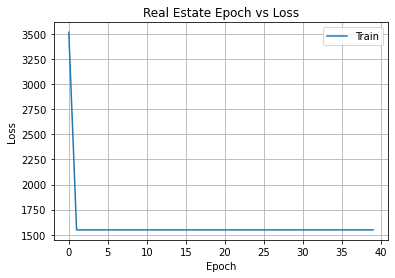

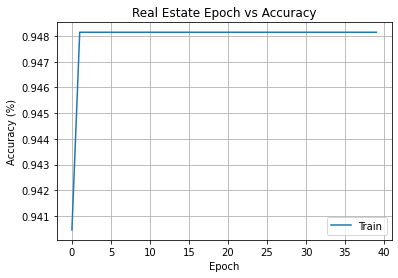

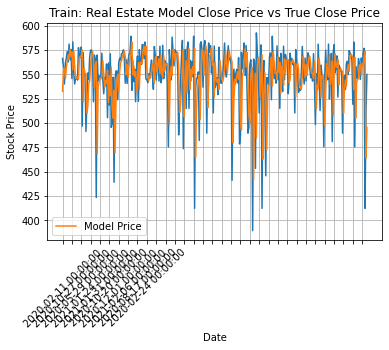

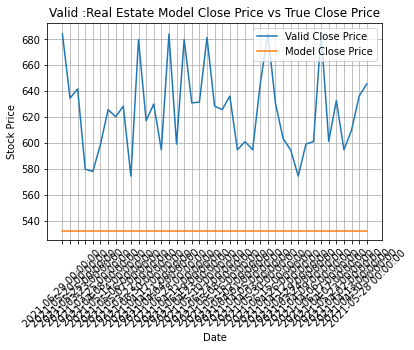

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


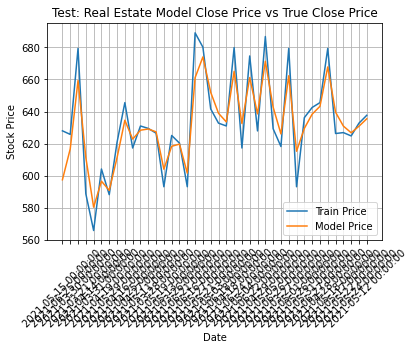

Communication Services


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0001  Training Loss: 569625422290339051339776.00 Training Accuracy: 82.71 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0002  Training Loss: 507083427942659499491328.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0003  Training Loss: 507083433307089020125184.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0004  Training Loss: 507083433307089020125184.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0005  Training Loss: 507083433307089020125184.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0006  Training Loss: 507083433307089020125184.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy: 72.68
Epoch: 0007  Training Loss: 507083433307089020125184.00 Training Accuracy: 83.31 Valid Loss: 2106016290194650344456192.00 Valid Accuracy

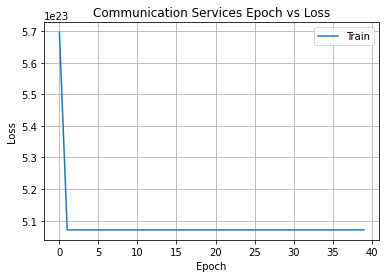

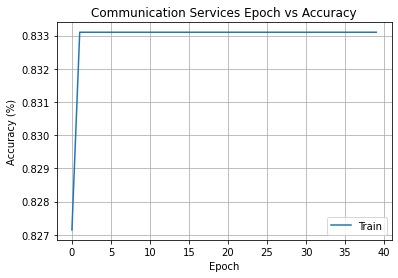

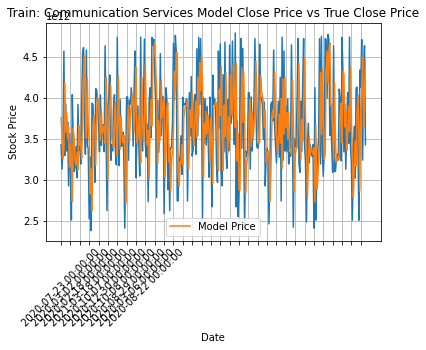

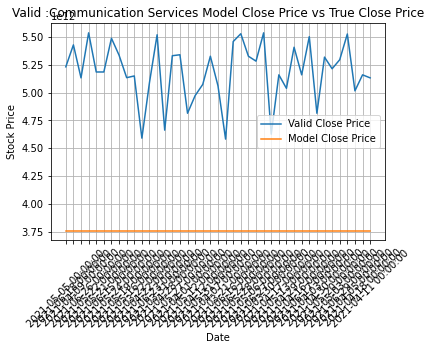

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


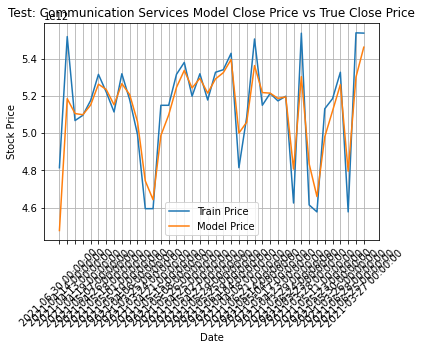

Consumer Discretionary


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0001  Training Loss: 6260459.31 Training Accuracy: 75.69 Valid Loss: 856393.36 Valid Accuracy: 92.16
Epoch: 0002  Training Loss: 5968159.27 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0003  Training Loss: 5968158.89 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0004  Training Loss: 5968158.91 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0005  Training Loss: 5968159.05 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0006  Training Loss: 5968158.75 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0007  Training Loss: 5968158.68 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0008  Training Loss: 5968158.82 Training Accuracy: 75.89 Valid Loss: 856396.63 Valid Accuracy: 92.16
Epoch: 0009  Training Loss: 5968159.10 Training Accuracy: 75.89 Valid Loss: 856395.00 Valid Accuracy: 92.16
Epoch: 0010  Training Loss: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px


masterNames = []
masterTrainAcc = []
masterValidAcc = []
masterTestAcc = []

for k in range(0,len(stock_data)):
  temp_stock =  (stock_data[k][1][252:]).reset_index(drop = True).set_index('Datestamp')


  print (stock_data[k][0][:-9])
  masterNames.append(stock_data[k][0][:-9])

  MasterDf = sentiment_df_sorted.join(temp_stock).fillna(method = 'ffill').fillna(method = 'bfill')


  train = (MasterDf[:int(MasterDf.shape[0]*0.8)]).sample(frac=1)


  X_train = torch.tensor(train['Sentiment'].reset_index(drop = True))
  y_train = torch.tensor(train['Stock Price'].reset_index(drop = True))

  test_and_val = (MasterDf[int(MasterDf.shape[0]*0.8):]).sample(frac=1)

  X_test_df = test_and_val[:int(test_and_val.shape[0]*0.5)]['Sentiment']
  y_test_df = test_and_val[:int(test_and_val.shape[0]*0.5)]['Stock Price']

  X_test = torch.tensor(X_test_df.reset_index(drop = True))
  y_test = torch.tensor(y_test_df.reset_index(drop = True))

  X_val_df = test_and_val[int(test_and_val.shape[0]*0.5):]['Sentiment']
  y_val_df = test_and_val[int(test_and_val.shape[0]*0.5):]['Stock Price']



  X_val = torch.tensor(X_val_df.reset_index(drop = True))
  y_val = torch.tensor(y_val_df.reset_index(drop = True))

  epochs = 40
  net = Model()
  learning_rate = 0.05
  criterion = nn.MSELoss()# BCE??
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

  train_loss_epoch = []
  train_acc_epoch = []

  valid_acc_epoch = []
  valid_loss_epoch = []

  model_y_valid = []
  model_y = []


  for epoch in range(epochs):
    train_acc = [] 
    train_loss =  []  
    valid_loss = []   
    acc_valid = [] 

    for i in range(0,len(X_train)):
      optimizer.zero_grad()
      y = net(X_train[i].float().view(1,1))
      loss = criterion (y, y_train[i].float().view(1,1))
      
      loss.backward()
      optimizer.step()
    
      # if y_train[i].float().view(1,1).numpy()[0][0] != 0:
      train_acc.append(1-(np.abs(y[0][0][0].detach().numpy() - y_train[i].float().view(1,1).numpy())[0][0])/y_train[i].float().view(1,1).numpy()[0][0])
      train_loss.append(loss.item())
      if epoch == 39:
        model_y.append(y[0][0][0].detach().numpy())
      

    for j in range(0,len(X_val)):
      y_2 = net(X_val[j].float().view(1,1))
      loss_v = criterion (y_2, y_val[j].float().view(1,1))
    

      acc_valid.append(1-(np.abs(y_2[0][0][0].detach().numpy() - y_val[j].float().view(1,1).numpy())[0][0])/y_val[j].float().view(1,1).numpy()[0][0])
      valid_loss.append(loss_v.item())
      if epoch == 39:
        model_y_valid.append(y_2[0][0][0].detach().numpy())
      

      #Store accuracy and loss for plotting
      
    train_loss_epoch.append(np.mean(train_loss))
    train_acc_epoch.append(np.mean(train_acc))
  
        
    valid_loss_epoch.append(np.mean(acc_valid))
    valid_acc_epoch.append(np.mean(valid_loss))
  

    print('Epoch: %04d  Training Loss: %.2f Training Accuracy: %.2f Valid Loss: %.2f Valid Accuracy: %.2f' % (epoch + 1, np.mean(train_loss), np.mean(train_acc)*100,np.mean(valid_loss), np.mean(acc_valid)*100))
          
  masterTrainAcc.append(np.mean(train_acc)*100)
  masterValidAcc.append(np.mean(acc_valid)*100)


  plt.title(stock_data[k][0][:-9] + " Epoch vs Loss")
  plt.plot(train_loss_epoch, label="Train")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.grid()
  plt.show()


  plt.title(stock_data[k][0][:-9]+" Epoch vs Accuracy")
  plt.plot(train_acc_epoch, label="Train")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy (%)")
  plt.legend(loc='best')
  plt.grid()
  plt.show()


  plt.title("Train: "+stock_data[k][0][:-9]+" Model Close Price vs True Close Price")
  plt.plot([i for i in range(0,len(y_train.detach().numpy()))], y_train.detach().numpy()) #, label="Train Price")
  plt.plot([i for i in range(0,len(y_train.detach().numpy()))], model_y, label="Model Price")
  plt.xticks([i for i in range(0,len(y_train.detach().numpy()), 10)],pd.to_datetime(train.index, format = "%Y%m%d")[:10:],rotation = 45)
  plt.xlabel("Date")
  plt.ylabel("Stock Price")
  plt.legend(loc='best')
  plt.grid()
  plt.show()


  plt.title("Valid :" +stock_data[k][0][:-9]+" Model Close Price vs True Close Price")
  plt.plot([i for i in range(0,len(y_val.detach().numpy()))], y_val.detach().numpy(), label="Valid Close Price")
  plt.plot([i for i in range(0,len(y_val.detach().numpy()))], model_y_valid, label="Model Close Price")
  plt.xticks([i for i in range(0,len(y_val.detach().numpy()))],pd.to_datetime(X_val_df.index, format = "%Y%m%d"),rotation = 45)
  plt.xlabel("Date")
  plt.ylabel("Stock Price")
  plt.legend(loc='best')
  plt.grid()
  plt.show()


  #test
  model_y = []
  for i in range(0,len(X_test)):
      optimizer.zero_grad()
      y = net(X_test[i].float().view(1,1))
      loss = criterion (y, y_test[i].float().view(1,1))
      
      loss.backward()
      optimizer.step()
    
      # if y_train[i].float().view(1,1).numpy()[0][0] != 0:
      train_acc.append((np.abs(y[0][0][0].detach().numpy() - y_test[i].float().view(1,1).numpy())[0][0])/y_test[i].float().view(1,1).numpy()[0][0])
      train_loss.append(loss.item())

      model_y.append(y[0][0][0].detach().numpy())

      train_acc.append(1-(np.abs(y[0][0][0].detach().numpy() - y_train[i].float().view(1,1).numpy())[0][0])/y_train[i].float().view(1,1).numpy()[0][0])
      train_loss.append(loss.item())
      

      #Store accuracy and loss for plotting



  
      
  plt.title("Test: "+stock_data[k][0][:-9]+" Model Close Price vs True Close Price")
  plt.plot([i for i in range(0,len(y_test.detach().numpy()[:len(y_test)-1]))], y_test.detach().numpy()[:len(y_test)-1], label="Train Price")
  plt.plot([i for i in range(0,len(y_test.detach().numpy()[:len(y_test)-1]))], model_y[1:], label="Model Price")
  plt.xticks([i for i in range(0,len(y_test.detach().numpy()[:len(y_test)-1]))],pd.to_datetime(X_test_df[1:].index, format = "%Y%m%d"),rotation = 45)
  plt.xlabel("Date")
  plt.ylabel("Stock Price")
  plt.legend(loc='best')
  plt.grid()
  plt.show()

  masterTestAcc.append(np.mean(train_acc)*100)


                

In [ ]:
display (pd.DataFrame({'Sector':masterNames, 'Training Accuracy':masterTrainAcc,'Test Accuracy':masterTestAcc}))
#'Validation Accuracy':masterValidAcc,


In [ ]:
  # # fig, ax = plt.subplots()
  from matplotlib.dates import DateFormatter

  plt.title("Train: "+stock_data[k][0][:-9]+" Model Close Price vs True Close Price")
  plt.plot([i for i in range(0,len(y_train.detach().numpy()))], y_train.detach().numpy()) #, label="Train Price")
  # plt.ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
  # ax.xaxis.set_minor_locator(mdates.MonthLocator())
  # plt.plot(train.index, model_y, label="Model Price")
  plt.xticks([i for i in range(0,len(y_train.detach().numpy()), 20)],pd.to_datetime(train.index, format = "%Y%m%d")[:20:],rotation = 45)
  plt.xlabel("Date")
  plt.ylabel("Stock Price")
  plt.legend(loc='best')
  plt.grid()
  plt.show()


# fig, ax = plt.subplots(figsize=(8, 6))
# # ax.plot ([i for i in range(0,len(y_train.detach().numpy()))],y_train.detach().numpy() )
# ax.scatter(pd.to_datetime(train.index, format = "%Y%m%d"),  y_train.detach().numpy())
# ax.scatter(pd.to_datetime(train.index, format = "%Y%m%d"),  y_train.detach().numpy())
#ax.plot(pd.to_datetime(train.index, format = "%Y%m%d"),  y_train.detach().numpy());